# IMPORTATION OF THE LIBRARIES AND THE DATASET

In [1]:
import os
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
df = pd.read_csv('C:/Users/BP/Desktop/projets pour github/energy forecasting/energydata.csv')
df['datetime'] = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)

# Sorting by ascending order the dates
df = df.sort_index(ascending = True)

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,v1,v2
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,NaN,45.56,6.483333,733.6,92.0,6.666667,NaN,5.2,18.606195,18.606195
2016-01-11 17:20:00,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,NaN,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,NaN,6.000000,51.500000,5.0,45.410390,45.410390
2016-01-11 17:40:00,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,NaN,5.666667,47.666667,4.9,10.084097,10.084097


# EXPLORATION

In [7]:
# look a shape of data
print('data shape: ', df.shape)

# look at data
display(df.head(2))

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
print('----------------')
display(df.iloc[:,:].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
print('----------------')
display(df.iloc[:,:].isnull().any())

# display descriptive statistics
print('----------------')
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

# display the maximum and the minimum of the energy use
print('----------------')
print('The maximum energy use is',max(df['Appliances']),'Wh on the',df[['Appliances']].idxmax() [0])
print('The minimum energy use is',min(df['Appliances']),'Wh on the',df[['Appliances']].idxmin() [0])

data shape:  (19735, 28)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,v1,v2
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60.0,30.0,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.0,5.3,13.275433,13.275433
2016-01-11 17:10:00,60.0,30.0,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,...,NaN,45.56,6.483333,733.6,92.0,6.666667,NaN,5.2,18.606195,18.606195


----------------


Appliances     float64
lights         float64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
v1             float64
v2             float64
dtype: object

----------------


Appliances      True
lights          True
T1              True
RH_1            True
T2              True
RH_2            True
T3              True
RH_3            True
T4              True
RH_4            True
T5              True
RH_5            True
T6              True
RH_6            True
T7              True
RH_7            True
T8              True
RH_8            True
T9              True
RH_9            True
T_out           True
Press_mm_hg     True
RH_out          True
Windspeed       True
Visibility      True
Tdewpoint       True
v1             False
v2             False
dtype: bool

----------------


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,v1,v2
count,18584.000000,18473.000000,16112.000000,16131.000000,15987.000000,16373.000000,16103.000000,16322.000000,16941.000000,16229.000000,...,16490.000000,16267.000000,18317.000000,16965.000000,17898.000000,17219.000000,16975.000000,17519.000000,19735.000000,19735.000000
mean,97.165842,3.774698,21.699781,40.509130,20.421932,40.540646,22.326110,39.453673,20.863671,39.353509,...,19.482582,41.761311,7.416647,755.515849,79.760336,4.035240,38.294615,3.761729,24.988033,24.988033
std,101.804159,7.905661,1.638859,3.944359,2.208164,4.061978,2.036273,3.247262,2.097519,4.275179,...,2.075905,4.180355,5.316440,7.422837,14.903160,2.443006,11.818781,4.189896,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.596667,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.730000,37.700000,18.890000,37.977778,20.790000,37.163333,19.500000,36.060000,...,18.000000,38.700000,3.700000,750.866667,70.333333,2.000000,29.000000,0.908333,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.900000,20.071429,40.663333,22.200000,38.790000,20.633333,38.663333,...,19.290000,41.163333,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.700000,43.266667,21.600000,43.400000,23.390000,42.000000,22.200000,42.500000,...,20.700000,44.700000,10.416667,760.950000,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
85%,120.000000,10.000000,23.390000,44.826667,22.686810,44.560000,24.566667,43.700000,23.290000,44.590000,...,22.250850,46.933333,12.800000,763.766667,94.333333,6.666667,51.000000,8.200000,42.699850,42.699850
95%,330.000000,20.000000,24.790000,47.400000,24.666667,46.700000,26.200000,45.200000,24.666667,46.900811,...,23.232223,49.125095,17.100000,766.650000,97.000000,9.000000,62.550000,11.233333,47.533568,47.533568
99%,570.000000,30.000000,25.500000,50.693333,27.033333,49.790000,27.163267,46.590000,25.600000,49.200000,...,24.100000,51.057525,22.497333,769.766667,99.166667,10.833333,64.666667,14.000000,49.462361,49.462361


----------------
The maximum energy use is 1080.0 Wh on the 2016-01-16 18:50:00
The minimum energy use is 10.0 Wh on the 2016-01-19 04:50:00


## PLOTS

### Scatter plot of the energy use over time

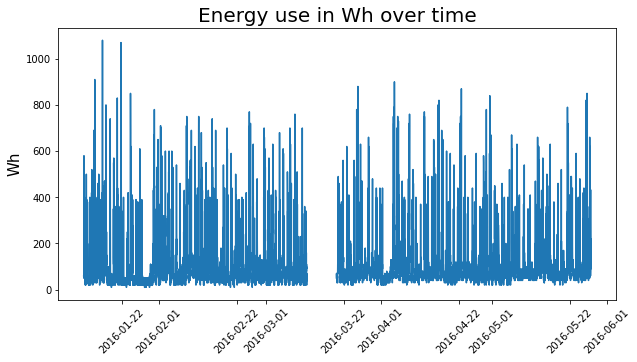

In [8]:
# Plot the "Appliances" over time
f, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(df['Appliances'])

# Add title
ax.set_title('Energy use in Wh over time',fontsize = 20)

# Set common labels
ax.set_ylabel('Wh',fontsize = 15)

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()

Text(0.5, 1.0, 'Energy use in Wh on a weekly basis')

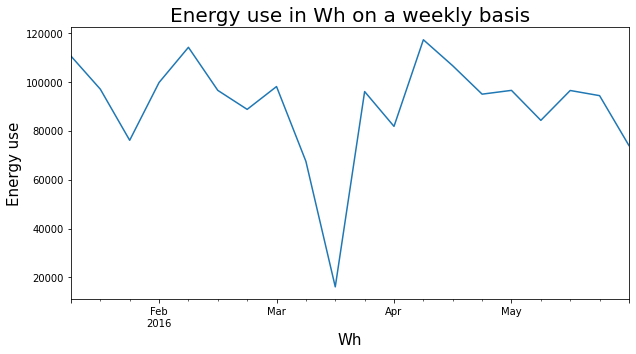

In [9]:
# on a weekly basis
weekly = df.resample('W').sum()
weekly['Appliances'].plot(figsize=(10,5))
plt.ylabel('Energy use',fontsize = 15)
plt.xlabel('Wh',fontsize = 15)
plt.title('Energy use in Wh on a weekly basis',fontsize = 20)

Text(0.5, 1.0, 'Energy use in Wh on a daily basis')

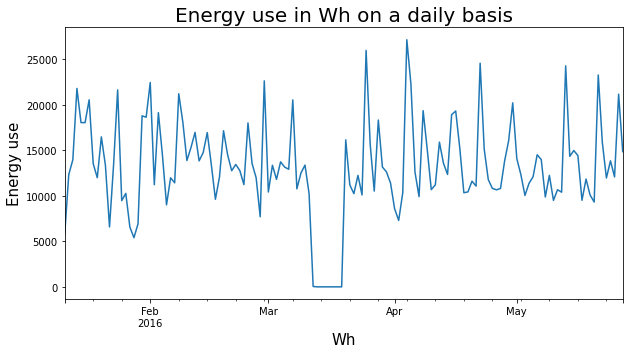

In [10]:
# on a daily basis
daily = df.resample('D').sum()
daily['Appliances'].plot(figsize=(10,5))
plt.ylabel('Energy use',fontsize = 15)
plt.xlabel('Wh',fontsize = 15)
plt.title('Energy use in Wh on a daily basis',fontsize = 20)

There is no clear trend for the energy use except maybe a little more energy use during January and February while it is not that clear from the above graphs ...

### Checking the distribution of all the variables to look for any abnormalities

[[<AxesSubplot:title={'center':'lights'}>
  <AxesSubplot:title={'center':'T1'}>
  <AxesSubplot:title={'center':'RH_1'}>
  <AxesSubplot:title={'center':'T2'}>
  <AxesSubplot:title={'center':'RH_2'}>]
 [<AxesSubplot:title={'center':'T3'}>
  <AxesSubplot:title={'center':'RH_3'}>
  <AxesSubplot:title={'center':'T4'}>
  <AxesSubplot:title={'center':'RH_4'}>
  <AxesSubplot:title={'center':'T5'}>]
 [<AxesSubplot:title={'center':'RH_5'}>
  <AxesSubplot:title={'center':'T6'}>
  <AxesSubplot:title={'center':'RH_6'}>
  <AxesSubplot:title={'center':'T7'}>
  <AxesSubplot:title={'center':'RH_7'}>]
 [<AxesSubplot:title={'center':'T8'}>
  <AxesSubplot:title={'center':'RH_8'}>
  <AxesSubplot:title={'center':'T9'}>
  <AxesSubplot:title={'center':'RH_9'}>
  <AxesSubplot:title={'center':'T_out'}>]
 [<AxesSubplot:title={'center':'Press_mm_hg'}>
  <AxesSubplot:title={'center':'RH_out'}>
  <AxesSubplot:title={'center':'Windspeed'}>
  <AxesSubplot:title={'center':'Visibility'}>
  <AxesSubplot:title={'center':

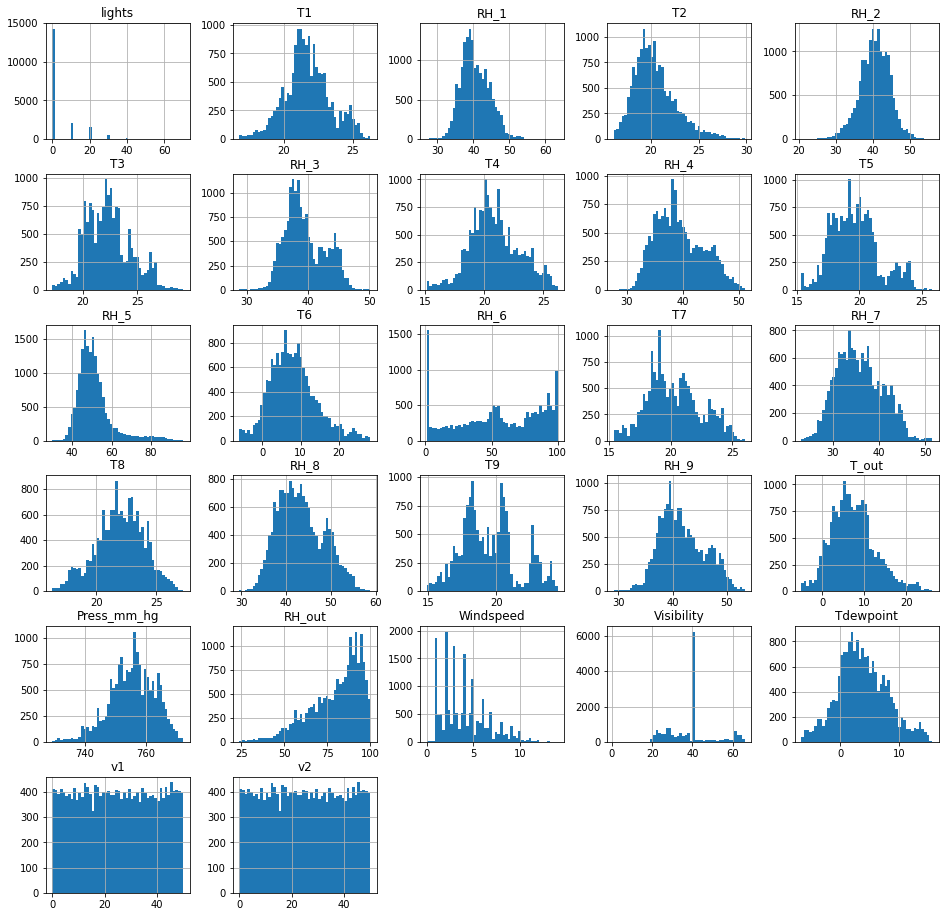

In [12]:
# distribution of all the variables
print(df[list(df.drop(columns = ['Appliances']).columns)].hist(bins = 50 , figsize= (16,16)))

Except for a few variables such as lights, v1, v2, RH-6, RH-OUT, T5, Windspeed and Visibility, all other variables seem to have a normal or quasi-normal distribution

### Correlation matrix between all the variables in the dataset

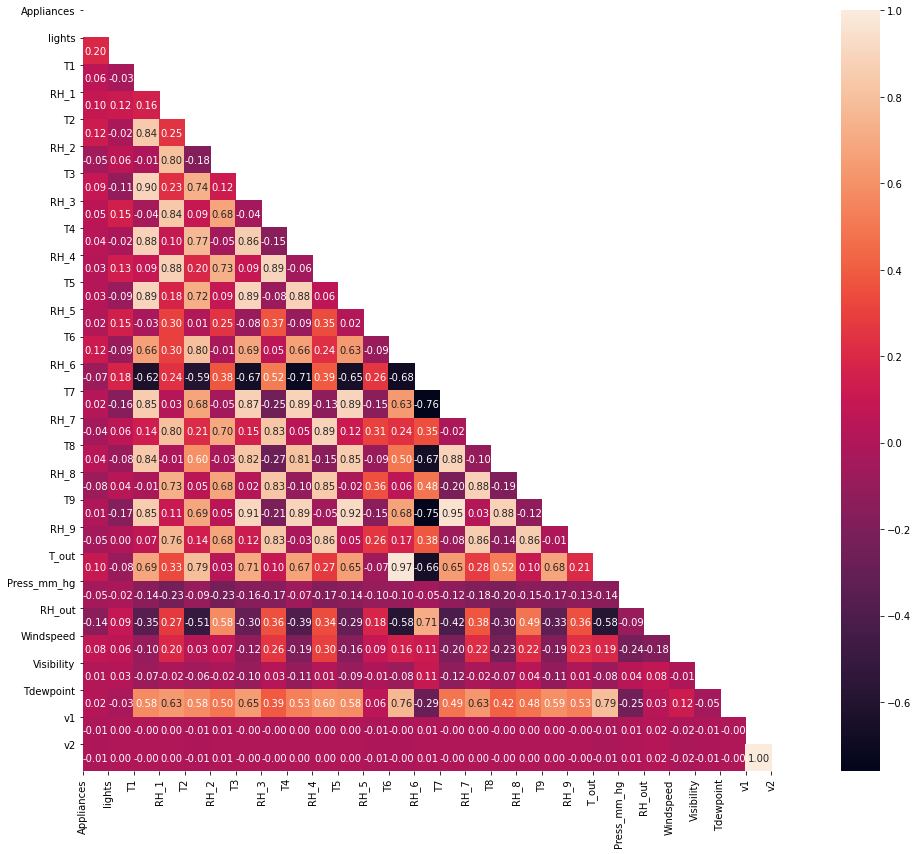

In [13]:
# Correlation matrix
# Use the weather , temperature , applainces and random column to see the correlation
df_corr = df[list(df.columns)]
corr = df_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

From the above correlation matrix we can see that :

*   All the variables except v1, v2, RH-out, Press_mm_hg, RH-6 to RH-9 and RH-2 are positively correlated with Appliances, even though the coefficients are small.

*   The largest correlation coefficient with appliances comes from the feature lights

*   Features v1 and v2 are the same features and have a correlation equal to 1. Furthermore, they are not correlated with any other feature in the dataset. These features will be removed in the preprocessing part.

*   Except for v1 and v2, the highest correlation is between T6 and T-out which is logical since the sensor for T6 is located outside the building

*   Features such as visibility, windspeed and Pressure_mm_hg have low correlation with other variables of the dataset







### Energy use during weekdays vs weekends 

In [14]:
# Weekdays vs weekends ?
df['WEEKDAY'] = ((df.index.dayofweek)// 5 == 1).astype(int)

# datasets for weekends and weekdays 
weekday_df = df[df['WEEKDAY'] == 0]
weekend_df = df[df['WEEKDAY'] == 1]

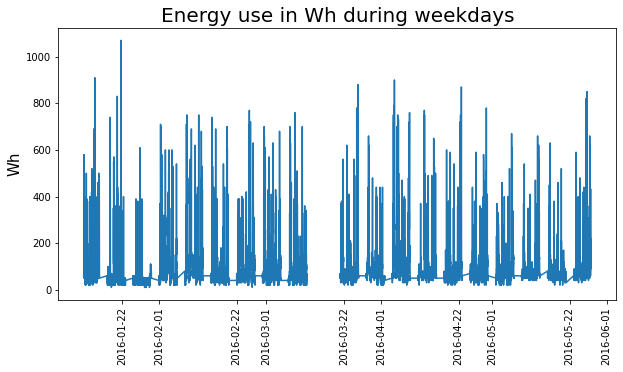

In [15]:
# Plot the "Appliances" for the weekdays
f, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(weekday_df['Appliances'])

# Add title
ax.set_title('Energy use in Wh during weekdays',fontsize = 20)

# Set common labels
ax.set_ylabel('Wh',fontsize = 15)

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 90)

# Show graph
plt.show()

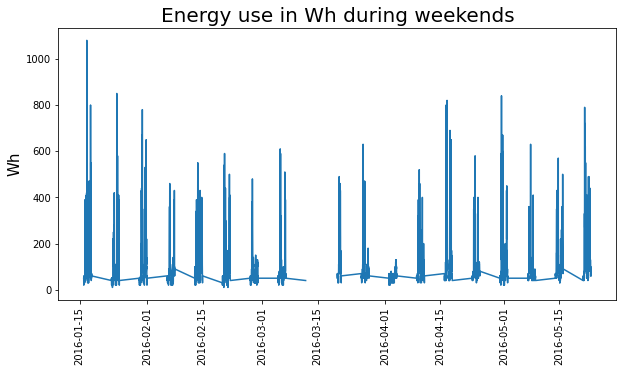

In [16]:
# Plot the "Appliances" for the weekends
f, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(weekend_df['Appliances'])

# Add title
ax.set_title('Energy use in Wh during weekends',fontsize = 20)

# Set common labels
ax.set_ylabel('Wh',fontsize = 15)

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 90)

# Show graph
plt.show()

There does not seem to be a noticeable difference in energy consumption between weekdays and weekends in terms of amount used

### Distribution plot of Appliances

Text(0, 0.5, 'Frequency')

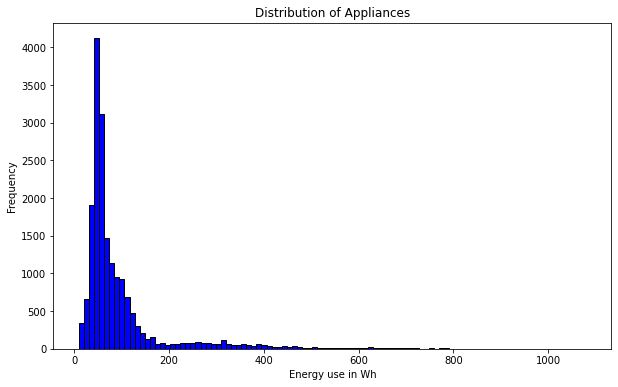

In [17]:
# distribution of the variable Appliances

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.hist(df['Appliances'], color = 'blue', edgecolor = 'black',
         bins = 100)

# Add labels
plt.title('Distribution of Appliances')
plt.xlabel('Energy use in Wh')
plt.ylabel('Frequency')

The distribution of Appliances is rightly skewed

# Modeling

## Data cleaning and Preprocessing

In [18]:
# Removing features v1 and v2 since they are not correlated to any other feature including Appliances.
if df['v1'].equals(df['v2']):
    df = df.drop(columns = ['v1','v2'])

# Remove observations where Appliances is Null 
df = df.dropna(axis=0, subset=['Appliances'])

# Imputing the remaining missing values by interpolating between the value just before and the value just after.
df = df.interpolate()

# In order to pass from a time series problem to a supervised problem I need to shift the response variable by 1. This means
# that I will shift the dataset in order to predict the response variable one step ahead. Therefore I use features at time t-3, t-2 and t-1
# to predict target variable at t

# removing Weekday
df = df.drop(columns=['WEEKDAY'])

df2 = df.copy()
num_lags = 3 # We will use variables at t-3, t-2 and t-1 
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Appliances') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

# final shape of the dataset
print('the final shape of the dataset is',df_processed.shape)



the final shape of the dataset is (18580, 157)


## Train test split

In [19]:
df_processed.reset_index(drop=True,inplace=True)
train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]
response_column = 'Appliances'

### Plotting the train test split data

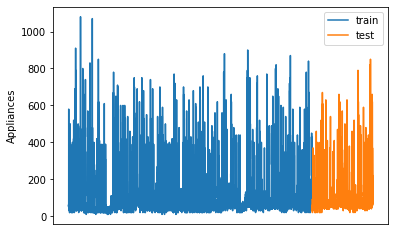

In [20]:
plt.plot(train.index,train[response_column])
plt.plot(test.index,test[response_column])
plt.ylabel(response_column,fontsize=10)
plt.xticks([])
plt.legend(['train','test'])
plt.show()

## Modeling using H2O library

In [21]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Processing c:\users\bp\appdata\local\pip\cache\wheels\e6\0d\48\064de7f50a0e16e6a10c5b22a8e8fd3ef371a84b146b6e5a3e\h2o-3.32.0.4-py2.py3-none-any.whl


### Feature selection + train/test

In [ ]:
from numpy import *
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

h2o.init()

# Converting pandas dataframe to h2o frame
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

from h2o.automl import H2OAutoML

# Identify predictors and response
x_h2o = train_h2o.columns
y_h2o = response_column
x_h2o.remove(y)


# select the values for lambda to grid over
hyper_params_lasso = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]
                     
                     }

search_criteria_lasso= {'strategy': 'RandomDiscrete',
                                'max_runtime_secs': 300,
                                'max_models': 10,
                                'stopping_metric': "auto",
                                'stopping_tolerance': 0.001,
                                'seed': 1234}


lasso = H2OGeneralizedLinearEstimator(seed =1234,alpha = 1,standardize = True)


# Train and validate a cartesian grid of GLMs
lasso_grid = H2OGridSearch(model=lasso,hyper_params=hyper_params_lasso, search_criteria=search_criteria_lasso,
                           grid_id = 'lasso_grid')

lasso_grid.train(x=x_h2o, y=y_h2o,training_frame= train_h2o)


# Get the different models
lasso_grid.get_grid(sort_by='rmse', decreasing= False)

best_lasso = lasso_grid.model_ids[0]
best_lasso = h2o.get_model(best_lasso)
var_imp_pd_lasso = pd.DataFrame(best_lasso.varimp(True))


# feature columns et target column
x_new_h2o = var_imp_pd_lasso.loc[var_imp_pd_lasso['scaled_importance'] > 0, 'variable'].unique().tolist()

# Initializing the model. The runtime is set to 15 minutes and a maximum of 100 models can be generated.
aml = H2OAutoML(max_models = 100,max_runtime_secs = 900, seed = 100)

# training
aml.train(x = x_new_h2o, 
          y = y_h2o,
          training_frame = train_h2o,
          leaderboard_frame = test_h2o)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyt9d4yn1
  JVM stdout: /tmp/tmpyt9d4yn1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyt9d4yn1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_na1so5
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
# View the AutoML Leaderboard
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20191021_165522_model_1,3263.97,57.1312,3263.97,29.741,nan
GBM_4_AutoML_20191021_165522,4180.99,64.6606,4180.99,39.2769,0.445075
StackedEnsemble_BestOfFamily_AutoML_20191021_165522,4508.38,67.1445,4508.38,48.1209,0.522532
GBM_2_AutoML_20191021_165522,5019.72,70.85,5019.72,47.9066,0.519196
StackedEnsemble_AllModels_AutoML_20191021_165522,5045.02,71.0283,5045.02,52.5619,0.558011
GBM_3_AutoML_20191021_165522,5067.99,71.1898,5067.99,49.9882,0.527954
XGBoost_2_AutoML_20191021_165522,5535.79,74.4029,5535.79,55.8045,0.582139
XGBoost_1_AutoML_20191021_165522,5626.81,75.0121,5626.81,57.3102,0.594031
XGBoost_3_AutoML_20191021_165522,5762.79,75.913,5762.79,55.7641,0.594881
DRF_1_AutoML_20191021_165522,9564.11,97.7963,9564.11,75.86,0.718652


In [ ]:
# Making predictions
hf_test_predict = aml.leader.predict(test_h2o)

df_results = pd.DataFrame()
df_results['ground_truth'] = test[response_column].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


,ground_truth,predictions
0,90.0,76.157995
1,80.0,68.398169
2,70.0,63.493696
3,60.0,49.859158
4,40.0,49.109780


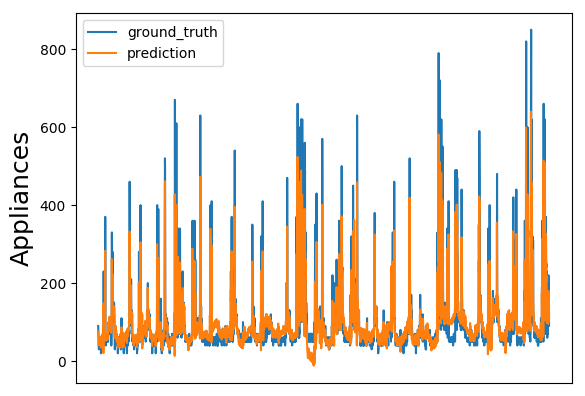

In [ ]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel(response_column,fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.xticks([])
plt.show()

In [ ]:
predictions= aml.leader.model_performance(test_data=test_h2o)
print('RMSE :',predictions.rmse())

RMSE : 57.13115908307184


### Variable importance plot

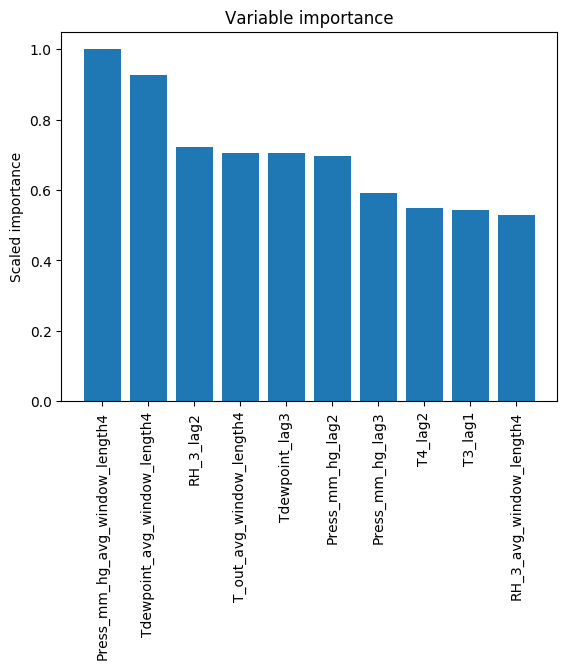

In [ ]:
table = var_imp_pd_lasso.iloc[0:10,:]

def plot_bar_x():
    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt
    # this is for plotting purpose
    variable = list(table['variable'])
    index = np.arange(len(variable))
    plt.bar(index, list(table['scaled_importance']))
    #plt.xlabel('Variables')
    plt.ylabel('Scaled importance')
    plt.xticks(index, variable, rotation=90)
    plt.title('Variable importance')
    plt.show()
    
    
plot_bar_x()